In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
import pickle
# Add the function directory to the path
sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from Slicing import Slicing
from fio import readin
from TurStat import TurStat
from tqdm import tqdm
from visualization import contour_generator

In [2]:
def shape_input(N, snapshot):
    x = np.reshape(np.array(snapshot.x), (N,N,N))
    y = np.reshape(np.array(snapshot.y), (N,N,N))
    z = np.reshape(np.array(snapshot.z), (N,N,N))
    ux = np.reshape(np.array(snapshot['u.x']), (N,N,N))
    uy = np.reshape(np.array(snapshot['u.y']), (N,N,N))
    uz = np.reshape(np.array(snapshot['u.z']), (N,N,N))
#     Evis = np.reshape(np.array(snapshot['Evis']), (N,N,N))
    dudy = np.reshape(np.array(snapshot['dudy']), (N,N,N))
    p = np.reshape(np.array(snapshot['p']), (N,N,N))
    gx = np.reshape(np.array(snapshot['g.x']), (N,N,N))
    return x,y,z,ux,uy,uz,dudy,p,gx

In [ ]:
# Plotting statistics like dissipation
filename = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000/stats.dat'
stats2 = pd.read_table(filename, delimiter = ' ')
# plt.plot(stats1.t[2:], stats1.energy[2:])
plt.plot(stats2.t, stats2.dissipation)

In [43]:
# Calculate ustar from first grid shear
# and an estimation of relevant scales
print(slope_ensemble)
nu = 2*np.pi/40000/(1/850)*(17.4e-6/8.9e-4)
dudy = 1.32
tau = dudy*nu
aH = (2*np.pi-1)*0.001
print('stress from viscous sublayer = %g' %tau)
print('stress from pressure gradient = %g' %aH)
delta_nu = nu/aH**0.5
print('viscous length scale = %g' %delta_nu)
delta_grid = 2*np.pi/2**8
print('grid spacing = %g' %delta_grid)
H = 2*np.pi-1
print('RE_tau = %g' %(H/delta_nu))
ustar = tau**0.5
print('ustar = %g' %ustar)

[1.37428679 1.30317858 1.26673021 1.25786994 1.25131835]
stress from viscous sublayer = 0.00344566
stress from pressure gradient = 0.00528319
viscous length scale = 0.0359129
grid spacing = 0.0245437
RE_tau = 147.111
ustar = 0.0586997


In [52]:
# An estimation of scales and needed resolution
nu = 17.4e-6/(1000/850)
a = 0.0001
H = 0.5
ustar = (a*H)**0.5
ustar = 0.1
print('ustar = %g' %ustar)
delta_nu = nu/ustar
print('viscous length scale = %g' %delta_nu)
delta_grid = H/2**12
print('grid spacing = %g' %delta_grid)
print('RE_tau = %g' %(H/delta_nu))

ustar = 0.1
viscous length scale = 0.0001479
grid spacing = 0.00012207
RE_tau = 3380.66


In [ ]:
# Uniform grid data read-in: directly sort and reshape
t = 55
filename = "/home/jiarong/research/projects/turbulence/curved_uniform_forcing_RE4000_LEVEL17_LEVEL24/field_%g" % t
snapshot = pd.read_table(filename, delimiter = ',')
snapshot = snapshot.sort_values(by = ['x','y','z'])
x,y,z,ux,uy,uz,dudy,p,gx = shape_input(2**8,snapshot)

In [6]:
# Set the style
# sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/project_specific/windwave')
# from style import set_style
# set_style()
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['xtick.labelsize'] = 'smaller'
plt.rcParams['ytick.labelsize'] = 'smaller'
plt.rcParams['legend.fontsize'] = 'small'

In [ ]:
# AMR grid data read-in: read in by slices
t = 55; sn = 32
NGRID = 256
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0.1_LEVEL9/'
filename = dirname + 'ux_t%g_slice%g' %(t,sn)
snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
snapshot.reshape([NGRID,NGRID+1])
ux = snapshot[:,0:NGRID].astype(np.float)

fig, grid = contour_generator()
image = np.rot90(ux)
pcontour = grid[0].imshow(image, extent=[-np.pi,np.pi,0,2*np.pi])
grid[0].cax.colorbar(pcontour)  

### plot the interface ###
filename = dirname + 'eta_t%g' % t
snapshot = pd.read_table(filename, delimiter = ',')
# Interpolate over x-z plane
xarray = np.arange(-np.pi,np.pi,0.1); zarray = np.arange(-np.pi,np.pi,0.1)
x_tile, z_tile = np.meshgrid(xarray,zarray)
xdata = np.array(snapshot.x); zdata = np.array(snapshot.z); etadata = np.array(snapshot.pos)
eta_tile = griddata((xdata.ravel(), zdata.ravel()), etadata.ravel(), (x_tile, z_tile), method='nearest')
eta_x = np.average(eta_tile, axis=0)
# The following line if it's fixed eta
# eta_x = 0.1*np.sin(4*xarray)+1
grid[0].plot(xarray,eta_x, color='k')

No handles with labels found to put in legend.


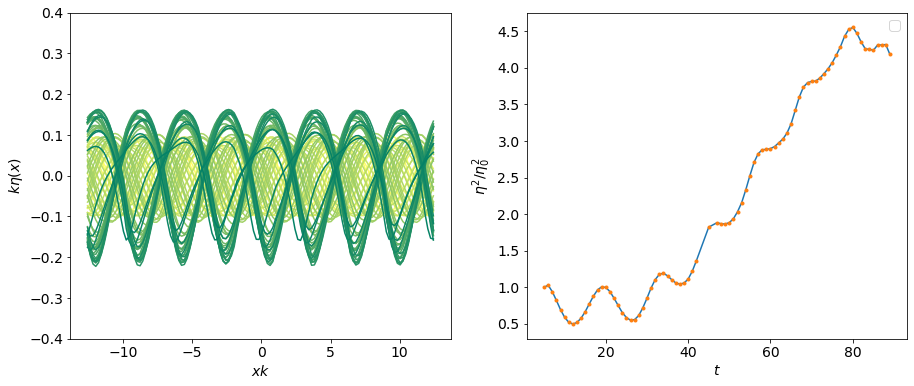

In [489]:
# Read in eta
from scipy.interpolate import LinearNDInterpolator, griddata
import matplotlib.gridspec as gridspec
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL9_03_refinewater/'
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0.1_LEVEL9_thinlayer/'
def eta_series(time):
    xarray = np.arange(-np.pi,np.pi,0.05); zarray = np.arange(-np.pi,np.pi,0.05)
    x_tile, z_tile = np.meshgrid(xarray,zarray)
    energy_t = []
    for i,t in enumerate(time):
        filename = dirname + 'eta/eta_t%g' % t
        snapshot = pd.read_table(filename, delimiter = ',')
        # Interpolate over x-z plane
        xdata = np.array(snapshot.x); zdata = np.array(snapshot.z); etadata = np.array(snapshot.pos)
        eta_tile = griddata((xdata.ravel(), zdata.ravel()), etadata.ravel(), (x_tile, z_tile), method='nearest')
        eta = np.average(eta_tile, axis=0)  
        ax1.plot(xarray*4, (eta-1)*4, label = 't = %g' %t, color=plt.cm.get_cmap('summer')(1-i/len(time)))
        eta_var = np.std(eta_tile)**2
        energy_t.append(eta_var)
    energy_t = np.array(energy_t)
    return energy_t

fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
time = np.arange(5,43,1)
time = np.append(time, 45)
time = np.append(time, np.arange(47,90,1))
# time = np.arange(55,96)
energy_t = eta_series (time)
ax1.set_ylim([-0.4,0.4])
ax1.set_xlabel(r'$xk$'); ax1.set_ylabel(r'$k\eta(x)$')
ax2.plot(time, energy_t/energy_t[0]); ax2.plot(time, energy_t/energy_t[0], '.'); ax2.set_xlabel(r'$t$'); ax2.set_ylabel(r'$\eta^2/\eta_{0}^2$')

from scipy.signal import argrelextrema
localmax_index = argrelextrema(energy_t, np.greater)[0]
index = np.zeros(1); index = np.append(index, localmax_index); index = index.astype(int)
localmax_time = time[index]
localmax = energy_t[index]
a, b = np.polyfit(localmax_time[0:3], np.log(localmax[0:3]), 1)
omega = 2*np.pi/3.13377
# ax2.plot(time, np.exp(b)*np.exp(a*time)/energy_t[0], linestyle='-.', label = r'$u_{*}/c=%0.1f, \overline{\beta}=%2.4f$' %(0.5,(a/omega)))
# ax2.legend()

In [545]:
def draw_eta(t,ax):
    xarray = np.arange(-np.pi,np.pi,0.05); zarray = np.arange(-np.pi,np.pi,0.05)
    x_tile, z_tile = np.meshgrid(xarray,zarray)
    filename = dirname + 'eta/eta_t%g' % t
    snapshot = pd.read_table(filename, delimiter = ',')
    # Interpolate over x-z plane
    xdata = np.array(snapshot.x); zdata = np.array(snapshot.z); etadata = np.array(snapshot.pos)
    eta_tile = griddata((xdata.ravel(), zdata.ravel()), etadata.ravel(), (x_tile, z_tile), method='nearest')
    pcontour = ax.imshow((eta_tile-1)*4, vmax = 0.4, vmin=-0.4); 
    ax.cax.colorbar(pcontour) 
    # pcontour.colorbar()

<Figure size 1200x800 with 0 Axes>

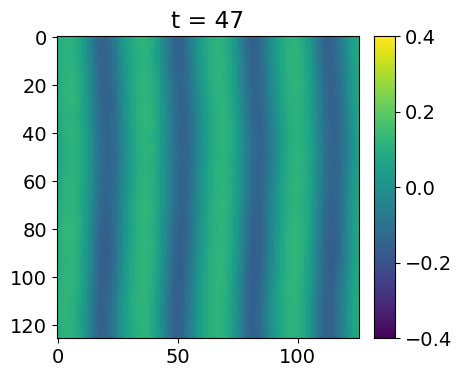

In [546]:
plt.rcParams['figure.dpi'] = 100

# Single animation generation function
def plot_animation(frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global dirname
    fig = plt.figure(figsize=(12,8)) 
    fig, grid = contour_generator()
    draw_eta(47,grid[0])

    # animation function.  This is called sequentially
    def animate(i):
        global dirname
        grid[0].clear(); 
#         ax1.axhline(0.05,ls='--',color='C7')
        t = 47 + i*1
        draw_eta(t,grid[0])
        grid[0].set_title('t = %g' %t)
        return fig

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = False)  
    return anim

NGRID = 256
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0.1_LEVEL9_thinlayer/'
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL9_03_refinewater/'
anim = plot_animation(frame_number = 44, interval_time = 400) # Specify frame number
HTML(anim.to_html5_video())

Text(0, 0.5, '$\\eta^2/\\eta_{0}^2$')

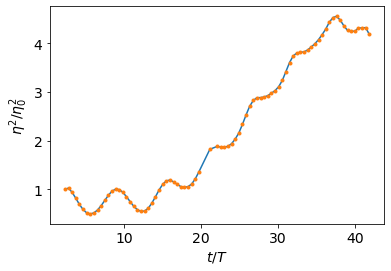

In [490]:
T = 2.13
fig = plt.figure()
ax = fig.gca()
ax.plot(time/T, energy_t/energy_t[0]); ax.plot(time/T, energy_t/energy_t[0], '.'); ax.set_xlabel(r'$t/T$'); ax.set_ylabel(r'$\eta^2/\eta_{0}^2$')

In [520]:
# Plot u*f contour
def plot_water(t,ax):
    global dirname, NGRID
    xarray = np.arange(-np.pi,np.pi,0.05); zarray = np.arange(-np.pi,np.pi,0.05)
    x_tile, z_tile = np.meshgrid(xarray,zarray)
    filename = dirname + 'eta/eta_t%g' % t
    snapshot = pd.read_table(filename, delimiter = ',')
    # Interpolate over x-z plane
    xdata = np.array(snapshot.x); zdata = np.array(snapshot.z); etadata = np.array(snapshot.pos)
    eta_tile = griddata((xdata.ravel(), zdata.ravel()), etadata.ravel(), (x_tile, z_tile), method='nearest')
    eta = np.average(eta_tile, axis=0)  
    # Read the velocity
    sn = 16
    filename = dirname + 'field/ux_t%g_slice%g' % (t,sn)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    ux = snapshot[:,0:NGRID].astype(np.float)
    filename = dirname + 'field/f_t%g_slice%g' % (t,sn)
    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
    snapshot.reshape([NGRID,NGRID+1])
    f = snapshot[:,0:NGRID].astype(np.float)
    ux_w = ux*f
#     ux_w = ux
    image = np.rot90(ux_w)
    pcontour = ax.imshow(image, extent=[-np.pi,np.pi,0,2*np.pi], vmax=0.2, vmin=-0.2) 
#     pcontour = ax.imshow(image, extent=[-np.pi,np.pi,0,2*np.pi], vmax = 10, vmin = 0) 
    ax.cax.colorbar(pcontour)  
    ax.cax.set_title('ux_w')
    ax.plot(xarray,eta, color='k')
    return 

<Figure size 1200x800 with 0 Axes>

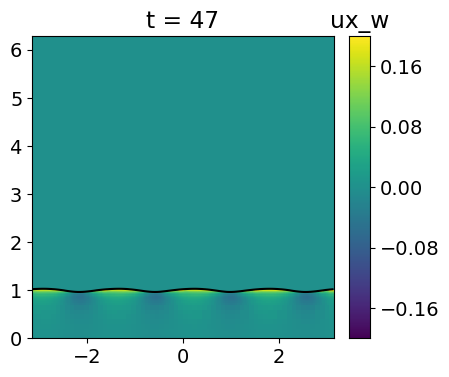

In [521]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

plt.rcParams['figure.dpi'] = 100

# Single animation generation function
def plot_animation(frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global dirname
    fig = plt.figure(figsize=(12,8)) 
    fig, grid = contour_generator()
    plot_water(47,grid[0])

    # animation function.  This is called sequentially
    def animate(i):
        global dirname
        grid[0].clear(); 
#         ax1.axhline(0.05,ls='--',color='C7')
        t = 47 + i*1
        plot_water(t,grid[0])
        grid[0].set_title('t = %g' %t)
        return fig

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = False)  
    return anim

NGRID = 256
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0.1_LEVEL9_thinlayer/'
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL9_03_refinewater/'
anim = plot_animation(frame_number = 44, interval_time = 400) # Specify frame number
HTML(anim.to_html5_video())

In [40]:
def mean_profile(dirname, NGRID, time, ax, ploteach = False):
    yarray = np.linspace(0,2*np.pi,NGRID)
    ux_ensemble = []
    for t in time:
        ux_3D = [] # axis0 in z, axis1 in x, axis2 in y  (in the code)
        for i in range (0,63):
            filename = dirname + 'ux_t%g_slice%g' % (t,i)
            snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
            snapshot.reshape([NGRID,NGRID+1])
            ux = snapshot[:,0:NGRID].astype(np.float)
            ux_3D.append(ux)
        ux_3D = np.array(ux_3D)
        ux_aver = np.zeros(NGRID)
        # Slice in x,z(y) plane and average
        for i in range(0,NGRID):
            ux_aver[i] = np.average(ux_3D[:,:,i])
        ux_ensemble.append(ux_aver)
        if (ploteach==True):
            ax.plot(ux_aver, (yarray-1)/(2*np.pi/4), color='gray')
            ax.plot(ux_aver, (yarray-1)/(2*np.pi/4), label = 't=%g' %t)
    ux_ensemble_aver = np.average(np.array(ux_ensemble), axis = 0)
    return ux_ensemble_aver

ytau = 0.004704


Text(0, 0.5, '$u^+$')

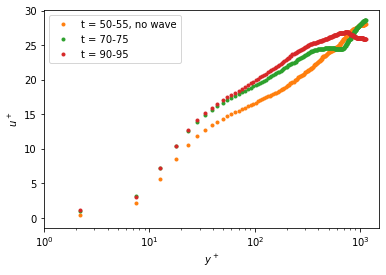

In [62]:
### Before and after wave
RATIO = 0.5
nu = 0.001176; c = 0.5; ustar = RATIO*c
ytau = nu/ustar
print('ytau = %g' %ytau)
fig = plt.figure(); ax = fig.gca()
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0.1_LEVEL9_thinlayer/'
NGRID = 256; time = np.arange(50,55,1)
ux_level9 = mean_profile(dirname, NGRID, time, ax)
yarray = np.linspace(0,2*np.pi,NGRID)
ax.plot((yarray-1)/ytau, ux_level9/ustar, '.', label='t = 50-55, no wave', color='C1', linewidth=4)
NGRID = 256; time = np.arange(70,75,1)
ux_level9 = mean_profile(dirname, NGRID, time, ax)
yarray = np.linspace(0,2*np.pi,NGRID)
ax.plot((yarray-1)/ytau, ux_level9/ustar, '.', label='t = 70-75', color='C2', linewidth=4)
NGRID = 256; time = np.arange(90,95,1)
ux_level9 = mean_profile(dirname, NGRID, time, ax)
yarray = np.linspace(0,2*np.pi,NGRID)
ax.plot((yarray-1)/ytau, ux_level9/ustar, '.', label='t = 90-95', color='C3', linewidth=4)
# Plot fit
ypart = np.arange(20,100)
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41
# ax.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+), \; \kappa=0.41$')
ax.legend()
ax.set_xlim([1,1500])
ax.set_xscale('log')
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$u^+$')

In [446]:
### Before and after wave
NGRID = 256
yarray = np.linspace(0,2*np.pi,NGRID)
ux_bin = []
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL9_03_refinewater/'
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL8_03_notmoving/'
ux = mean_profile(dirname, 256, np.arange(5,10,1), ax)
ux_bin.append(ux)
ux = mean_profile(dirname, 256, np.arange(10,15,1), ax)
ux_bin.append(ux)
ux = mean_profile(dirname, 256, np.arange(15,20,1), ax)
ux_bin.append(ux)
ux = mean_profile(dirname, 256, np.arange(20,25,1), ax)
ux_bin.append(ux)
ux = mean_profile(dirname, 256, np.arange(25,30,1), ax)
ux_bin.append(ux)
ux = mean_profile(dirname, 256, np.arange(30,35,1), ax)
ux_bin.append(ux)
ux = mean_profile(dirname, 256, np.arange(35,40,1), ax)
ux_bin.append(ux)

ytau = 0.00468919


Text(0, 0.5, '$u^+$')

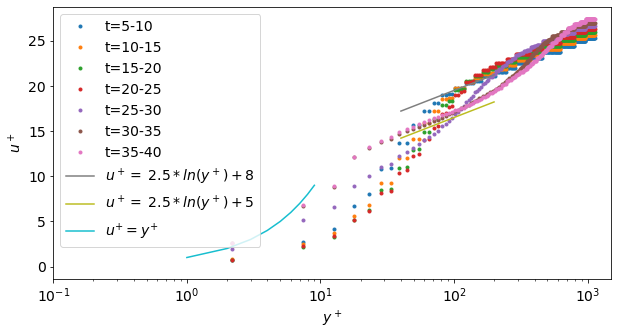

In [447]:
RATIO = 0.5
nu = 0.001735; c = 0.74; ustar = RATIO*c
ytau = nu/ustar
print('ytau = %g' %ytau)
fig = plt.figure(figsize=[10,5]); ax = fig.gca()
yarray = np.linspace(0,2*np.pi,NGRID)
label_bin = ['t=5-10','t=10-15','t=15-20','t=20-25','t=25-30','t=30-35','t=35-40']
for i in range (0,7):
    ax.plot((yarray-1)/ytau, ux_bin[i]/ustar, '.', label=label_bin[i], linewidth=2)
z0 = ytau
ypart = np.arange(40,200)
upart = np.log(ypart*ytau/z0)/0.4 + 8
ax.plot(ypart, upart, label = r'$u^+ = \;2.5*ln(y^+) + 8 $')
ax.plot(ypart, upart-3, label = r'$u^+ = \;2.5*ln(y^+) + 5 $')
xvisc = np.arange(1,10)
uvisc = xvisc
ax.plot(xvisc,uvisc, label = '$u^{+} = y^{+}$')
ax.legend(loc='upper left')
ax.set_xlim([0.1,1500])
ax.set_xscale('log')
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$u^+$')

ytau = 0.01176


Text(0, 0.5, '$u^+$')

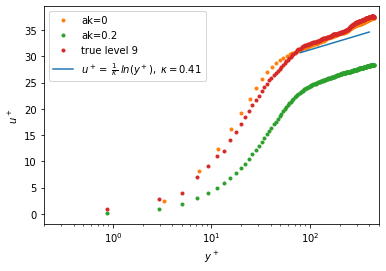

In [125]:
# ak = 0.1 vs flat
fig = plt.figure(); ax = fig.gca()
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0_LEVEL8/'
NGRID = 128; time = np.arange(13,18,1)
ux1 = mean_profile(dirname, NGRID, time, ax)
yarray = np.linspace(0,2*np.pi,NGRID)
ax.plot((yarray-1)/ytau, ux1/ustar, '.', label='ak=0', color='C1', linewidth=4)
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0.1_LEVEL9_thinlayer/'
NGRID = 256; time = np.arange(70,80,1)
ux2 = mean_profile(dirname, NGRID, time, ax)
yarray = np.linspace(0,2*np.pi,NGRID)
ax.plot((yarray-1)/ytau, ux2/ustar, '.', label='ak=0.2', color='C2', linewidth=4)

dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0_LEVEL9_leveltest1/'
NGRID = 256; time = np.arange(27.1,27.9,0.1)
ux3 = mean_profile(dirname, NGRID, time, ax)
yarray = np.linspace(0,2*np.pi,NGRID)
ax.plot((yarray-1)/ytau, ux3/ustar, '.', label='true level 9', color='C3', linewidth=4)

RATIO = 0.2
# nu = 0.001176
nu = 0.001176; c = 0.5; ustar = RATIO*c
ytau = nu/ustar
print('ytau = %g' %ytau)
ypart = np.arange(80,400)
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41+20
ax.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+), \; \kappa=0.41$')
ax.legend()
ax.set_xlim([0.2,500])
ax.set_xscale('log')
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$u^+$')

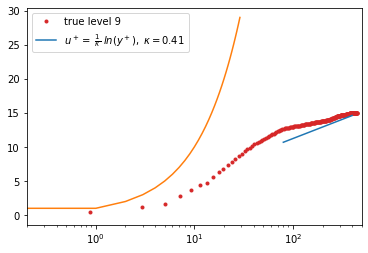

In [158]:
fig = plt.figure(); ax = fig.gca()
ax.plot((yarray-1)/ytau, ux3/ustar, '.', label='level 9', color='C3', linewidth=4)
ypart = np.arange(80,400)
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41
ax.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+), \; \kappa=0.41$')
xvisc = np.arange(0,30)
uvisc = xvisc
ax.plot(xvisc,uvisc)
ax.set_xlim([0.2,500])
ax.set_xscale('log')
ax.legend()

### Finally reasonable fit
u*/c = 0.5 has reasonable fit with A = 5 while u*/c = 0.2 might be a bit off.

In [346]:
# Read in level 8 and 9, u*/c = 0.5
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0_LEVEL8/'
NGRID = 256; time = np.arange(5,17,1)
ux1 = mean_profile(dirname, NGRID, time, ax)
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0_LEVEL9_leveltest1/'
NGRID = 256; time = np.arange(15,17,0.1)
ux2 = mean_profile(dirname, NGRID, time, ax)

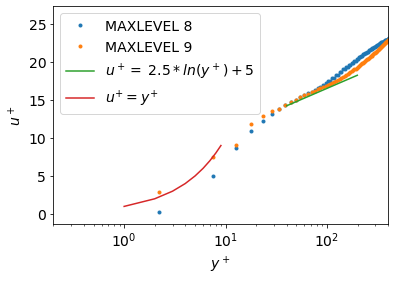

In [364]:
# Trying to fit u*/c = 0.5
plt.rcParams['font.size'] = 14
fig = plt.figure(); ax = fig.gca()
ypart = np.arange(40,200)
RATIO = 0.5
# nu = 0.001176
nu = 0.001735; c = 0.74; ustar = RATIO*c
ytau = nu/ustar
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.4 + 5
ax.plot((yarray-1)/ytau, ux1/ustar, '.', label='MAXLEVEL 8', linewidth=4)
ax.plot((yarray-1)/ytau, ux2/ustar, '.', label='MAXLEVEL 9', linewidth=4)
ax.plot(ypart, upart, label = r'$u^+ = \;2.5*ln(y^+) + 5 $')
# ax.plot(ypart, upart+12, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+) + 12, \; \kappa=0.41$')
# ax.plot((np.ones(ux2.size)*1.5-1)/z0, ux2/ustar, '--', color = 'grey')
# ax.plot((np.ones(ux2.size)*4-1)/z0, ux2/ustar, '--',  color = 'grey')
xvisc = np.arange(1,10)
uvisc = xvisc
ax.plot(xvisc,uvisc, label = '$u^{+} = y^{+}$', color = 'C3')
ax.set_xlim([0.2,400])
ax.set_xscale('log')
ax.legend(loc = 'upper left')
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$u^+$')
fig.savefig('average.svg',bbox_inches='tight')

In [300]:
# Read in level 9, u*/c = 0.2
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0_LEVEL9_leveltest1/'
NGRID = 256; time = np.arange(27.4,28.4,0.1)
ux3 = mean_profile(dirname, NGRID, time, ax)

In [ ]:
# Try to fit level 9, u*/c = 0.2
fig = plt.figure(); ax = fig.gca()
ypart = np.arange(20,100)
RATIO = 0.2
# nu = 0.001176
nu = 0.001735; c = 0.74; ustar = RATIO*c
ytau = nu/ustar
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41 + 5
ax.plot((yarray-1)/ytau, ux3/ustar, '.', label='level 9', linewidth=4)
ax.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+)+5, \; \kappa=0.41$')
# ax.plot(ypart, upart+12, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+) + 12, \; \kappa=0.41$')
ax.plot((np.ones(ux3.size)*1.5-1)/z0, ux3/ustar, '--', color = 'grey')
ax.plot((np.ones(ux3.size)*4-1)/z0, ux3/ustar, '--',  color = 'grey')
xvisc = np.arange(1,10)
uvisc = xvisc
ax.plot(xvisc,uvisc, label = 'linear fit', color = 'C3')
ax.set_xlim([0.2,400])
ax.set_xscale('log')
ax.legend()
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$u^+$')

### LEVEL and uemax

In [342]:
# # Read in level 8 and 9, u*/c = 0.5
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0_LEVEL8/'
# NGRID = 256; time = np.arange(5,17,1)
# ux1 = mean_profile(dirname, NGRID, time, ax)
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0_LEVEL9_leveltest1/'
# NGRID = 256; time = np.arange(15,17,0.1)
# ux2 = mean_profile(dirname, NGRID, time, ax)
# Read in level 8, uemaxRATIO=0.3, u*/c = 0.5
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL8_03/'
# NGRID = 256; time = np.arange(4,5,0.1)
# ux3 = mean_profile(dirname, NGRID, time, ax)
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL8_01/'
# NGRID = 256; time = np.arange(1,2.1,0.1)
# ux4 = mean_profile(dirname, NGRID, time, ax)
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL9_03/'
NGRID = 256; time = np.arange(9,10,0.1)
ux5 = mean_profile(dirname, NGRID, time, ax)

Text(0, 0.5, '$u^+$')

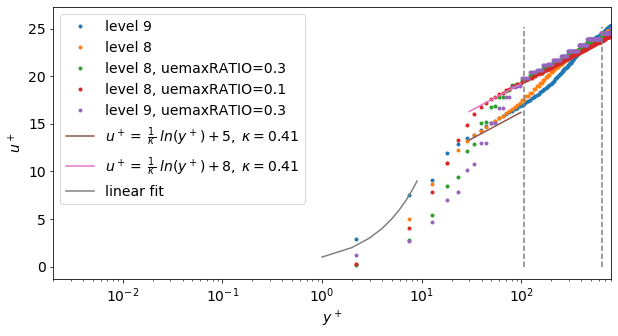

In [369]:
# Try to fit level 9, u*/c = 0.2
fig = plt.figure(figsize=[10,5]); ax = fig.gca()
ypart = np.arange(30,100)
RATIO = 0.5
# nu = 0.001176
nu = 0.001735; c = 0.74; ustar = RATIO*c
ytau = nu/ustar
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41 + 5
ax.plot((yarray-1)/ytau, ux2/ustar, '.', label='level 9', linewidth=4)
ax.plot((yarray-1)/ytau, ux1/ustar, '.', label='level 8', linewidth=4)
ax.plot((yarray-1)/ytau, ux3/ustar, '.', label='level 8, uemaxRATIO=0.3', linewidth=4)
ax.plot((yarray-1)/ytau, ux4/ustar, '.', label='level 8, uemaxRATIO=0.1', linewidth=4)
ax.plot((yarray-1)/ytau, ux5/ustar, '.', label='level 9, uemaxRATIO=0.3', linewidth=4)
ax.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+)+5, \; \kappa=0.41$')
ax.plot(ypart, upart+3, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+)+8, \; \kappa=0.41$')
# ax.plot(ypart, upart+12, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+) + 12, \; \kappa=0.41$')
ax.plot((np.ones(ux3.size)*1.5-1)/z0, ux3/ustar, '--', color = 'grey')
ax.plot((np.ones(ux3.size)*4-1)/z0, ux3/ustar, '--',  color = 'grey')
xvisc = np.arange(1,10)
uvisc = xvisc
ax.plot(xvisc,uvisc, label = 'linear fit', color = 'grey')
ax.set_xlim([0.002,800])
ax.set_xscale('log')
ax.legend()
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$u^+$')

ytau = 0.04704
ytau = 0.01176


Text(0, 0.5, '$u^+$')

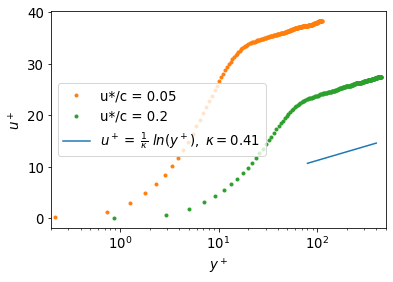

In [248]:
### u*/c = 0.05 vs 0.2 ###
# u*/c = 0.05
RATIO = 0.05
nu = 0.001176; c = 0.5; ustar = RATIO*c
ytau = nu/ustar
print('ytau = %g' %ytau)
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0.1_LEVEL9/'
NGRID = 256; time = np.arange(50,55,1)
ux_level9 = mean_profile(dirname, NGRID, time)
yarray = np.linspace(0,2*np.pi,NGRID)
plt.plot((yarray-1)/ytau, ux_level9/ustar, '.', label='u*/c = 0.05', color='C1', linewidth=4)
ypart = np.arange(80,400)
# u*/c = 0.2
RATIO = 0.2
nu = 0.001176; c = 0.5; ustar = RATIO*c
ytau = nu/ustar
print('ytau = %g' %ytau)
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0.1_LEVEL9/'
NGRID = 256; time = np.arange(50,55,1)
ux_level9 = mean_profile(dirname, NGRID, time)
yarray = np.linspace(0,2*np.pi,NGRID)
plt.plot((yarray-1)/ytau, ux_level9/ustar, '.', label='u*/c = 0.2', color='C2', linewidth=4)
ypart = np.arange(80,400)
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41
plt.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+), \; \kappa=0.41$')
plt.legend()
plt.xlim([0.2,500])
plt.xscale('log')
plt.xlabel(r'$y^+$'); plt.ylabel(r'$u^+$')

ytau = 0.01176


Text(0, 0.5, '$u^+$')

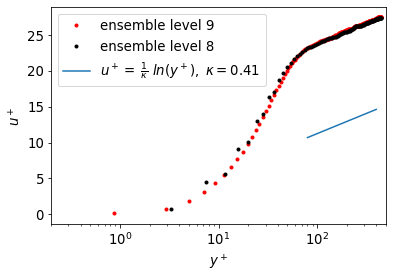

In [245]:
### Normalize, extract z0 ###
# Case physical properties
RATIO = 0.2
nu = 0.001176; c = 0.5; ustar = RATIO*c
ytau = nu/ustar
print('ytau = %g' %ytau)
# LEVEL9
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0.1_LEVEL9/'
NGRID = 256; time = np.arange(50,55,1)
ux_level9 = mean_profile(dirname, NGRID, time)
yarray = np.linspace(0,2*np.pi,NGRID)
plt.plot((yarray-1)/ytau, ux_level9/ustar, '.', label='ensemble level 9', color='red', linewidth=4)
# LEVEL 8
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0.1_LEVEL8_testinit/'
NGRID = 128; time = np.arange(45,50,1)
ux_level8 = mean_profile(dirname, NGRID, time)
yarray = np.linspace(0,2*np.pi,NGRID)
plt.plot((yarray-1)/ytau, ux_level8/ustar, '.', label='ensemble level 8', color='black', linewidth=4)
# Plot the fit
ypart = np.arange(80,400)
z0 = ytau
upart = np.log(ypart*ytau/z0)/0.41
plt.plot(ypart, upart, label = r'$u^+ = \;\frac{1}{\kappa} \; ln(y^+), \; \kappa=0.41$')
plt.legend()
plt.xlim([0.2,500])
plt.xscale('log')
plt.xlabel(r'$y^+$'); plt.ylabel(r'$u^+$')

In [ ]:
# Try average by phase

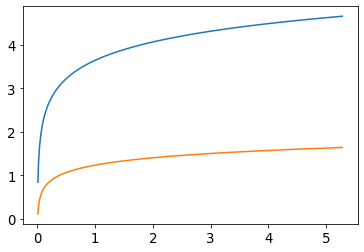

In [167]:
# A rough sketch of the profile
nu = 0.000629867; c = 0.5; 
RATIO = 0.5; ustar = RATIO*c
ytau = nu/ustar
yarray = np.arange(0,2*np.pi-1,0.01)
plt.plot(yarray[1:], ustar*np.log(yarray[1:]/ytau)/0.41)
RATIO = 0.2; ustar = RATIO*c
ytau = nu/ustar
yarray = np.arange(0,2*np.pi-1,0.01)
plt.plot(yarray[1:], ustar*np.log(yarray[1:]/ytau)/0.41)

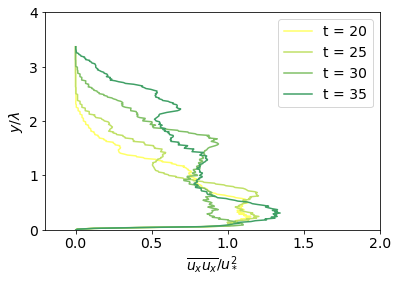

In [440]:
# Turbulent stress
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.2_ak0_LEVEL9_leveltest1/'
# dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_region_RE10000_Ustar0.5_ak0_LEVEL9_leveltest1/'
yarray = np.linspace(0,2*np.pi,NGRID)
# time = np.arange(55,70)
# time = np.arange(14,18,0.5)
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL9_03_refinewater/'
dirname = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL8_03_notmoving/'
NGRID = 256; time = np.arange(20,40,5)
# time = np.arange(27.5,28.4,0.1)
NSLICE = 64
uxuy_ensemble = []
nu = 0.001735; c = 0.74
RATIO = 0.5; ustar = RATIO*c
delta = 2*np.pi - 1
wavelength = 2*np.pi/4

for index,t in enumerate(time): 
    ux_3D = [] # axis0 in z, axis1 in x, axis2 in y  (in the code)
    uy_3D = []
    for sn in range (0,NSLICE-1):
        filename = dirname + 'ux_t%g_slice%g' % (t,sn)
        snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
        snapshot.reshape([NGRID,NGRID+1])
        ux = snapshot[:,0:NGRID].astype(np.float)
        ux_3D.append(ux)
        filename = dirname + 'uy_t%g_slice%g' % (t,sn)
        snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
        snapshot.reshape([NGRID,NGRID+1])
        uy = snapshot[:,0:NGRID].astype(np.float)
        uy_3D.append(uy)
    ux_3D = np.array(ux_3D)
    uy_3D = np.array(uy_3D)
    uxuy_aver = np.zeros(NGRID)
    # Slice in x,z(y) plane and average
    for i in range(0,NGRID):
        ux_aver = np.average(ux_3D[:,:,i])
        uy_aver = np.average(uy_3D[:,:,i])
        uxuy = (ux_3D[:,:,i]-ux_aver)*(uy_3D[:,:,i]-uy_aver)
        #uxuy = (ux_3D[:,:,i]-ux_aver)*(ux_3D[:,:,i]-ux_aver)
        uxuy_aver[i] = np.average(uxuy)
    plt.plot(-uxuy_aver/ustar**2, (yarray-1)/wavelength, label='t = %g' %t, color=plt.cm.get_cmap('summer')(1-index/len(time)))
    uxuy_ensemble.append(uxuy_aver)
#     plt.imshow(ux_3D[:,:,32])
#     # Average in z direction
#     for 


uxuy_ensemble = np.array(uxuy_ensemble)    
# plt.plot(np.average(-uxuy_ensemble,axis=0)/ustar**2, (yarray-1)/delta, label='average' %t, color = 'r')
plt.ylim([0,4])
plt.xlim([-0.2,2])
# plt.plot(-uxuy_aver/ustar**2, (np.ones(uxuy_aver.size)*2-1)/delta, '--', color = 'grey')
# plt.plot(-uxuy_aver/ustar**2, (np.ones(uxuy_aver.size)*4-1)/delta, '--', color = 'grey')
plt.xlabel(r'$\overline{u_xu_x}/u_*^2$') 
# plt.ylabel(r'$y/\delta$')
plt.ylabel(r'$y/\lambda$')
plt.legend()
# Laminar shear stress

# ...

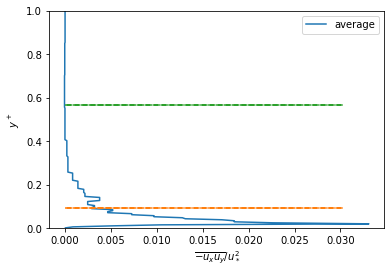

In [344]:
RATIO = 0.5
nu = 0.001735; c = 0.74; ustar = RATIO*c
plt.plot(np.average(-uxuy_ensemble,axis=0)/ustar**2, (yarray-1)/delta, label='average' %t)
plt.ylim([0,1])
plt.plot(-uxuy_aver/ustar**2, (np.ones(uxuy_aver.size)*1.5-1)/delta, '--')
plt.plot(-uxuy_aver/ustar**2, (np.ones(uxuy_aver.size)*4-1)/delta, '--')
plt.xlabel(r'$\overline{-u_xu_y}/u_*^2$'); plt.ylabel(r'$y^+$')
plt.legend()

In [337]:
# Number of grid points
name = 'perfs'
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL7_05/'
perfs1,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL7_03/'
perfs2,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL7_01/'
perfs3,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL8_05/'
perfs4,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL8_03/'
perfs5,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL8_01/'
perfs6,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL9_03/'
perfs7,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0_LEVEL9_02/'
perfs8,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])

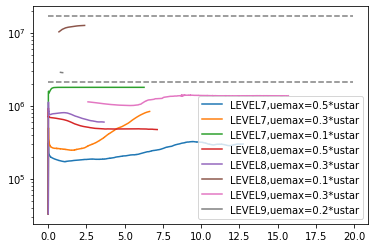

In [341]:
plt.plot(perfs1.t,perfs1.gridn,label='LEVEL7,uemax=0.5*ustar')
plt.plot(perfs2.t,perfs2.gridn,label='LEVEL7,uemax=0.3*ustar')
plt.plot(perfs3.t,perfs3.gridn,label='LEVEL7,uemax=0.1*ustar')
plt.plot(perfs4.t,perfs4.gridn,label='LEVEL8,uemax=0.5*ustar')
plt.plot(perfs5.t,perfs5.gridn,label='LEVEL8,uemax=0.3*ustar')
plt.plot(perfs6.t,perfs6.gridn,label='LEVEL8,uemax=0.1*ustar')
plt.plot(perfs7.t,perfs7.gridn,label='LEVEL9,uemax=0.3*ustar')
plt.plot(perfs8.t,perfs8.gridn,label='LEVEL9,uemax=0.2*ustar')
a = np.arange(0,20,0.1)
plt.plot(a,np.ones(a.size)*256**3,'--', color='gray')
plt.plot(a,np.ones(a.size)*128**3,'--', color='gray')
plt.yscale('log')
plt.legend()

In [460]:
name = 'perfs'
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL9_03_refinewater/'
perfs1,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL8_03_refinewater/'
perfs2,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])
path = '/home/jiarong/research/projects/turbulence/curved_uniform_forcing_moving_RE10000_Ustar0.5_ak0.1_LEVEL8_03_notmoving/'
perfs3,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'dt', 'mgp_i', 'mgp_nrelax', 'mgpf_i', 'mgpf_nrelax','mgu_i','mgu_nrelax','gridn','perf_t','perf_speed','npe'])

Text(0, 0.5, 'grid #')

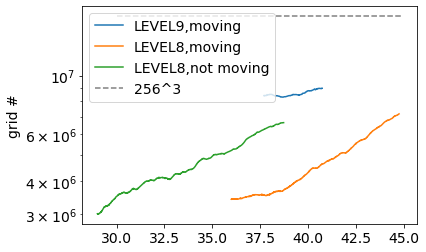

In [475]:
plt.plot(perfs1.t,perfs1.gridn,label='LEVEL9,moving')
plt.plot(perfs2.t,perfs2.gridn,label='LEVEL8,moving')
plt.plot(perfs3.t,perfs3.gridn,label='LEVEL8,not moving')
a = np.arange(30,45,0.1)
plt.plot(a,np.ones(a.size)*256**3,'--', color='gray',label='256^3')
# plt.plot(a,np.ones(a.size)*512**3,'--', color='gray')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.ylabel('grid #')

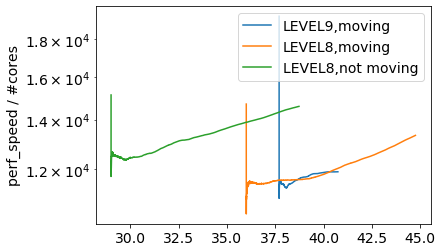

In [467]:
plt.plot(perfs1.t,perfs1.perf_speed/160,label='LEVEL9,moving')
plt.plot(perfs2.t,perfs2.perf_speed/160,label='LEVEL8,moving')
plt.plot(perfs3.t,perfs3.perf_speed/160,label='LEVEL8,not moving')
# a = np.arange(30,40,0.1)
# plt.plot(a,np.ones(a.size)*256**3,'--', color='gray')
# plt.plot(a,np.ones(a.size)***3,'--', color='gray')
plt.yscale('log')
plt.ylabel('perf_speed / #cores')
plt.legend()